 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import warnings
import seaborn as sns

warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whales_csv = Path("Resources/whale_returns.csv")
whales_df = pd.read_csv(whales_csv)
whales_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whales_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whales_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_csv)
algo_df

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [6]:
# Count nulls
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_csv = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_csv)
sp500_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [9]:
# Check Data Types
sp500_df.dtypes

Date     object
Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$','')
sp500_df['Close'] = sp500_df['Close'].astype(float)
sp500_df['Date'] = sp500_df['Date'].str.replace('Jan','1')
sp500_df['Date'] = sp500_df['Date'].str.replace('Feb','2')
sp500_df['Date'] = sp500_df['Date'].str.replace('Mar','3')
sp500_df['Date'] = sp500_df['Date'].str.replace('Apr','4')
sp500_df['Date'] = sp500_df['Date'].str.replace('May','5')
sp500_df['Date'] = sp500_df['Date'].str.replace('Jun','6')
sp500_df['Date'] = sp500_df['Date'].str.replace('Jul','7')
sp500_df['Date'] = sp500_df['Date'].str.replace('Aug','8')
sp500_df['Date'] = sp500_df['Date'].str.replace('Sep','9')
sp500_df['Date'] = sp500_df['Date'].str.replace('Oct','10')
sp500_df['Date'] = sp500_df['Date'].str.replace('Nov','11')
sp500_df['Date'] = sp500_df['Date'].str.replace('Dec','12')
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
sp500_df.dtypes


Date     datetime64[ns]
Close           float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_df['Close'] = sp500_df['Close'].pct_change(1)
sp500_df.head()

,Date,Close
0,2019-04-23,NaN
1,2019-04-22,-0.008764
2,2019-04-18,-0.001011
3,2019-04-17,-0.001577
4,2019-04-16,0.002279


In [12]:
# Drop nulls
sp500_df.dropna()

,Date,Close
1,2019-04-22,-0.008764
2,2019-04-18,-0.001011
3,2019-04-17,-0.001577
4,2019-04-16,0.002279
5,2019-04-15,-0.000509
...,...,...
1644,2012-05-10,0.003469
1645,2012-04-10,0.000322
1646,2012-03-10,-0.007123
1647,2012-02-10,-0.003611


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename(columns={'Close':'Index'})
sp500_df.head()

,Date,Index
0,2019-04-23,NaN
1,2019-04-22,-0.008764
2,2019-04-18,-0.001011
3,2019-04-17,-0.001577
4,2019-04-16,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
whales_df['Date'] = pd.to_datetime(whales_df['Date'])
algo_df['Date'] = pd.to_datetime(algo_df['Date'])
strats_df = whales_df.merge(algo_df,how='inner')
strats_df = strats_df.merge(sp500_df,how='inner')
strats_df = strats_df.set_index('Date')
strats_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Index
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,0.008698
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.015568
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.003558
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,-0.020113


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

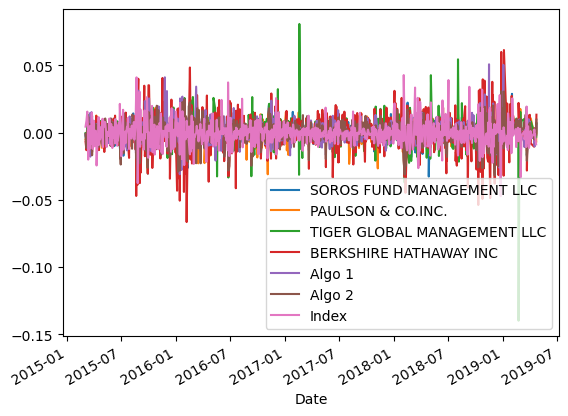

In [15]:
# Plot daily returns of all portfolios
strats_df.plot()

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

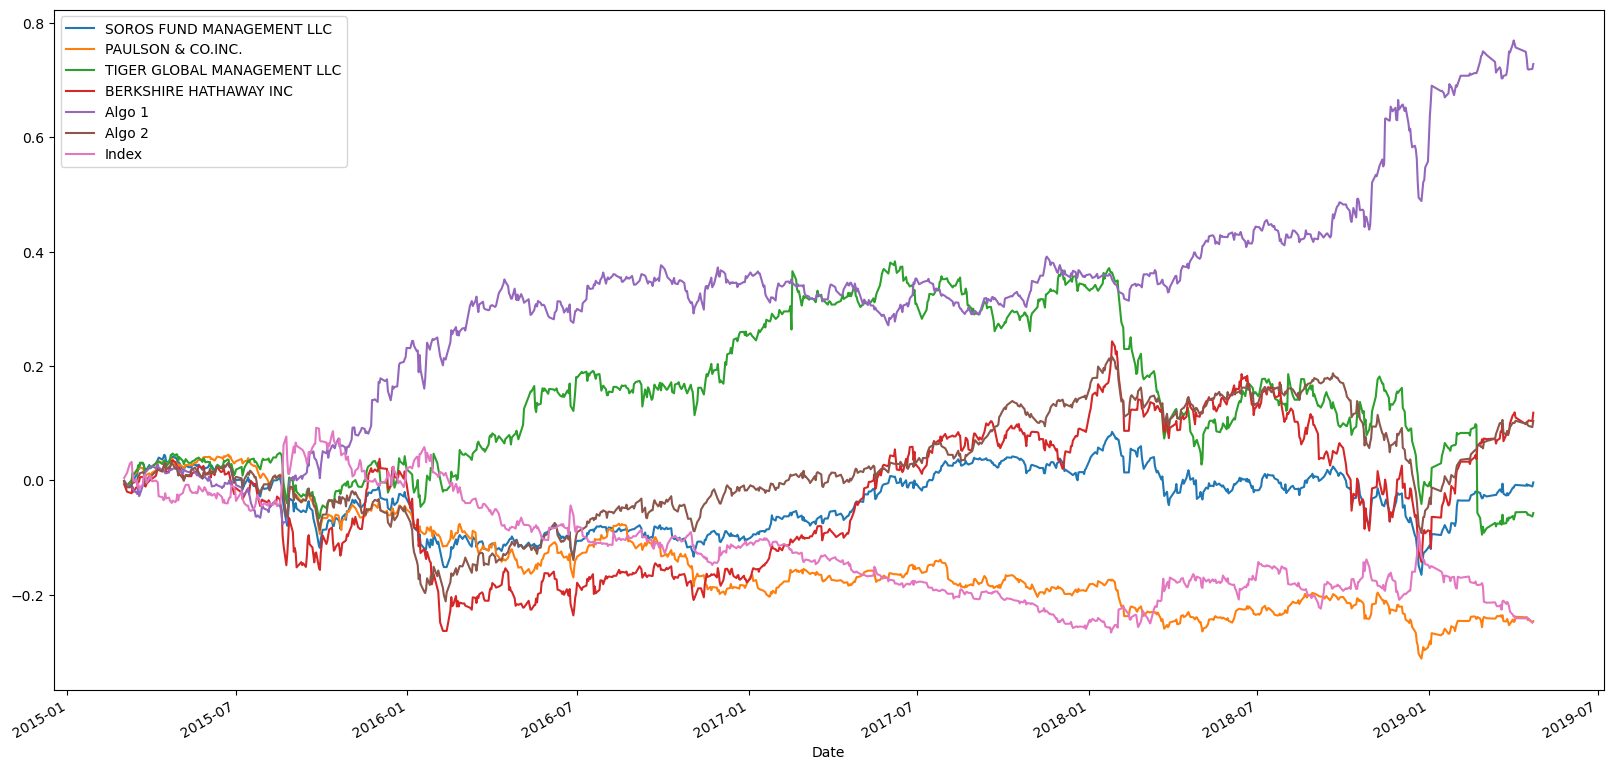

In [16]:
# Calculate cumulative returns of all portfolios
def cr_df_function(dataframe,index):
    cr = (1 + dataframe[index]).cumprod() - 1
    df = pd.DataFrame(cr)
    return df

cr_soros = cr_df_function(strats_df,'SOROS FUND MANAGEMENT LLC')
cr_paulson = cr_df_function(strats_df,'PAULSON & CO.INC. ')
cr_tiger = cr_df_function(strats_df,'TIGER GLOBAL MANAGEMENT LLC')
cr_berkshire = cr_df_function(strats_df,'BERKSHIRE HATHAWAY INC')
cr_algo_1 = cr_df_function(strats_df,'Algo 1')
cr_algo_2 = cr_df_function(strats_df,'Algo 2')
cr_index = cr_df_function(strats_df,'Index')
cumulative_returns = pd.concat([cr_soros,cr_paulson,cr_tiger,cr_berkshire,cr_algo_1,cr_algo_2,cr_index],axis='columns',join='inner')
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

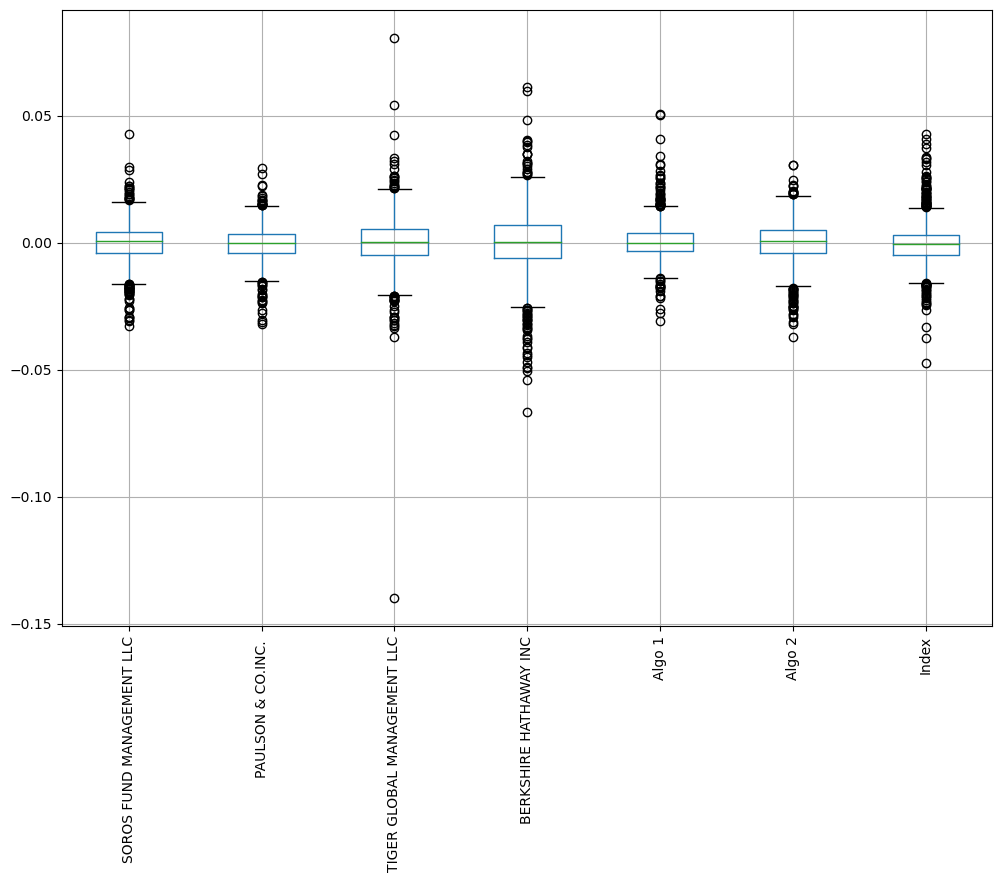

In [17]:
# Box plot to visually show risk
strats_df.boxplot(rot=90,fontsize=10,figsize=(12,8))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
standard_dev = strats_df.std().sort_values()
standard_dev

PAULSON & CO.INC.              0.007047
Algo 1                         0.007716
SOROS FUND MANAGEMENT LLC      0.008082
Algo 2                         0.008444
Index                          0.008826
TIGER GLOBAL MANAGEMENT LLC    0.011122
BERKSHIRE HATHAWAY INC         0.013203
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
standard_dev > standard_dev['Index']
# Determine which portfolios are riskier than the S&P 500


PAULSON & CO.INC.              False
Algo 1                         False
SOROS FUND MANAGEMENT LLC      False
Algo 2                         False
Index                          False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
standard_dev_anual = standard_dev*np.sqrt(252)
standard_dev_anual

PAULSON & CO.INC.              0.111862
Algo 1                         0.122484
SOROS FUND MANAGEMENT LLC      0.128290
Algo 2                         0.134047
Index                          0.140109
TIGER GLOBAL MANAGEMENT LLC    0.176553
BERKSHIRE HATHAWAY INC         0.209584
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

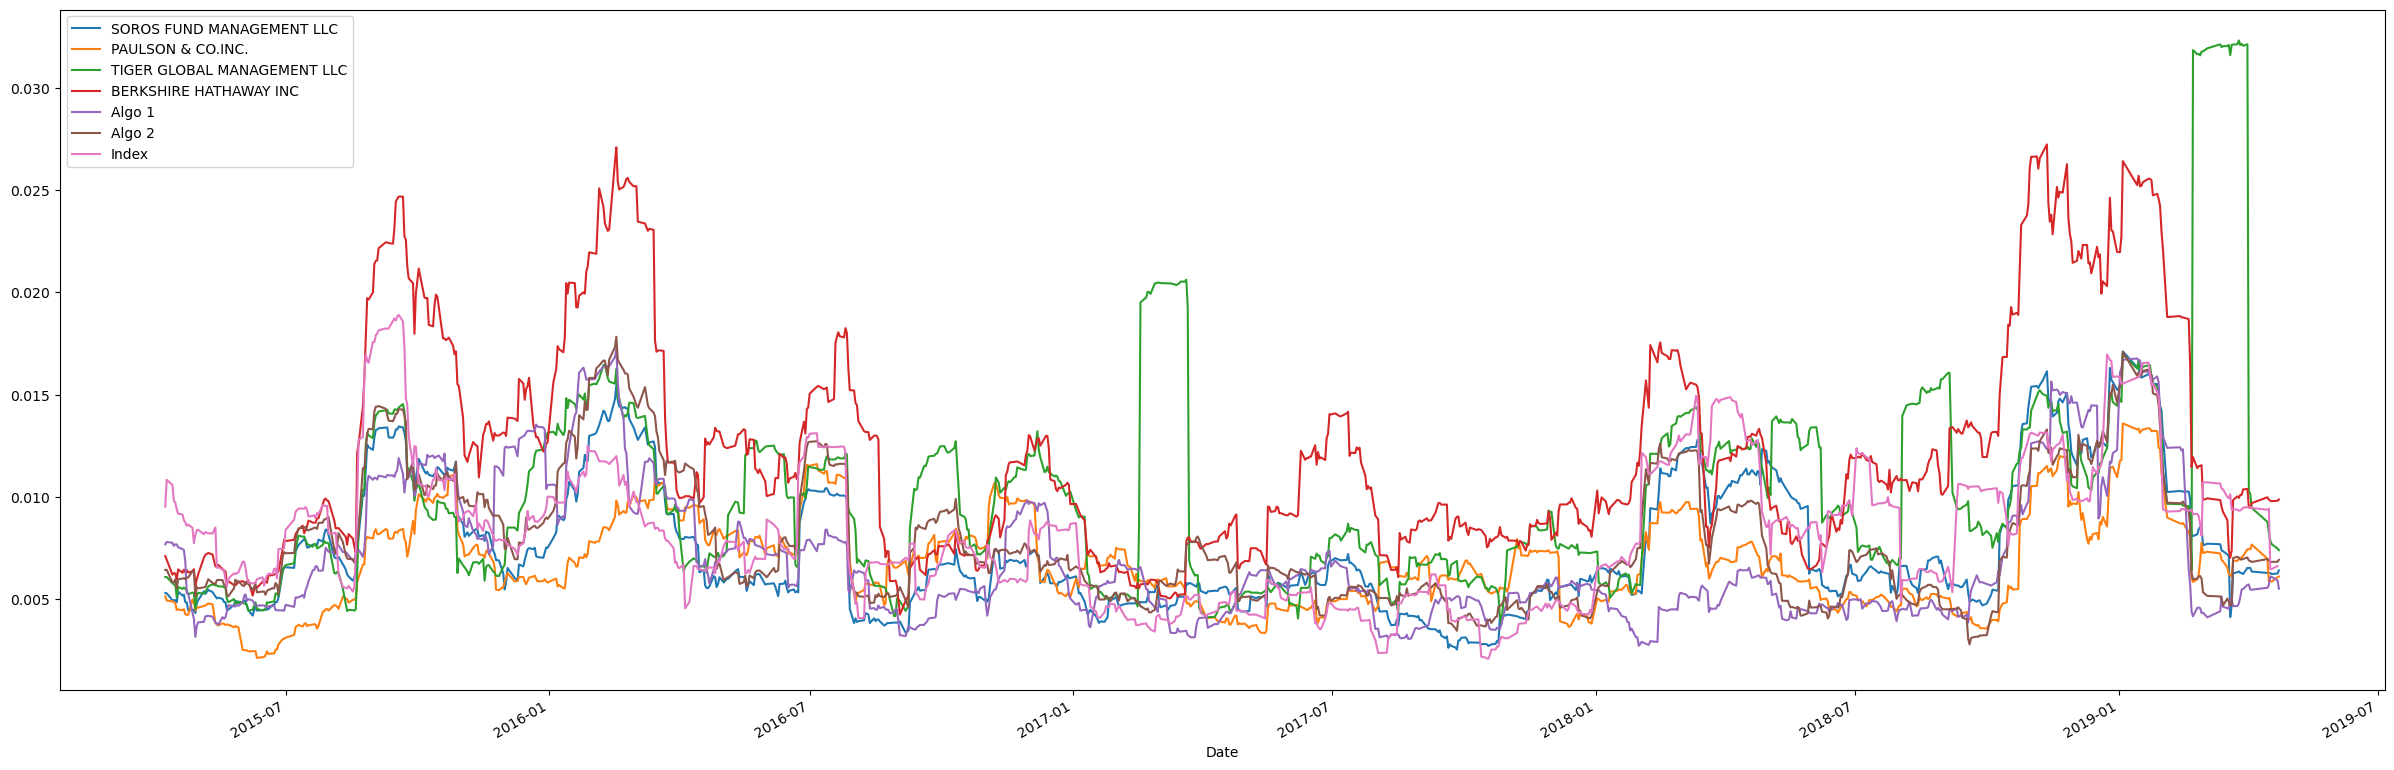

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
strats_df.rolling(window=21).std().plot(figsize=(30,10))
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [22]:
# Calculate the correlation
correlation = strats_df.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Index
SOROS FUND MANAGEMENT LLC,1.000000,0.712186,0.566221,0.763264,0.327283,0.834970,-0.030496
PAULSON & CO.INC.,0.712186,1.000000,0.448354,0.572178,0.285069,0.702887,0.004977
TIGER GLOBAL MANAGEMENT LLC,0.566221,0.448354,1.000000,0.422670,0.168969,0.514076,-0.028153
BERKSHIRE HATHAWAY INC,0.763264,0.572178,0.422670,1.000000,0.306704,0.700024,-0.042343
Algo 1,0.327283,0.285069,0.168969,0.306704,1.000000,0.293335,-0.039907
Algo 2,0.834970,0.702887,0.514076,0.700024,0.293335,1.000000,-0.038879
Index,-0.030496,0.004977,-0.028153,-0.042343,-0.039907,-0.038879,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

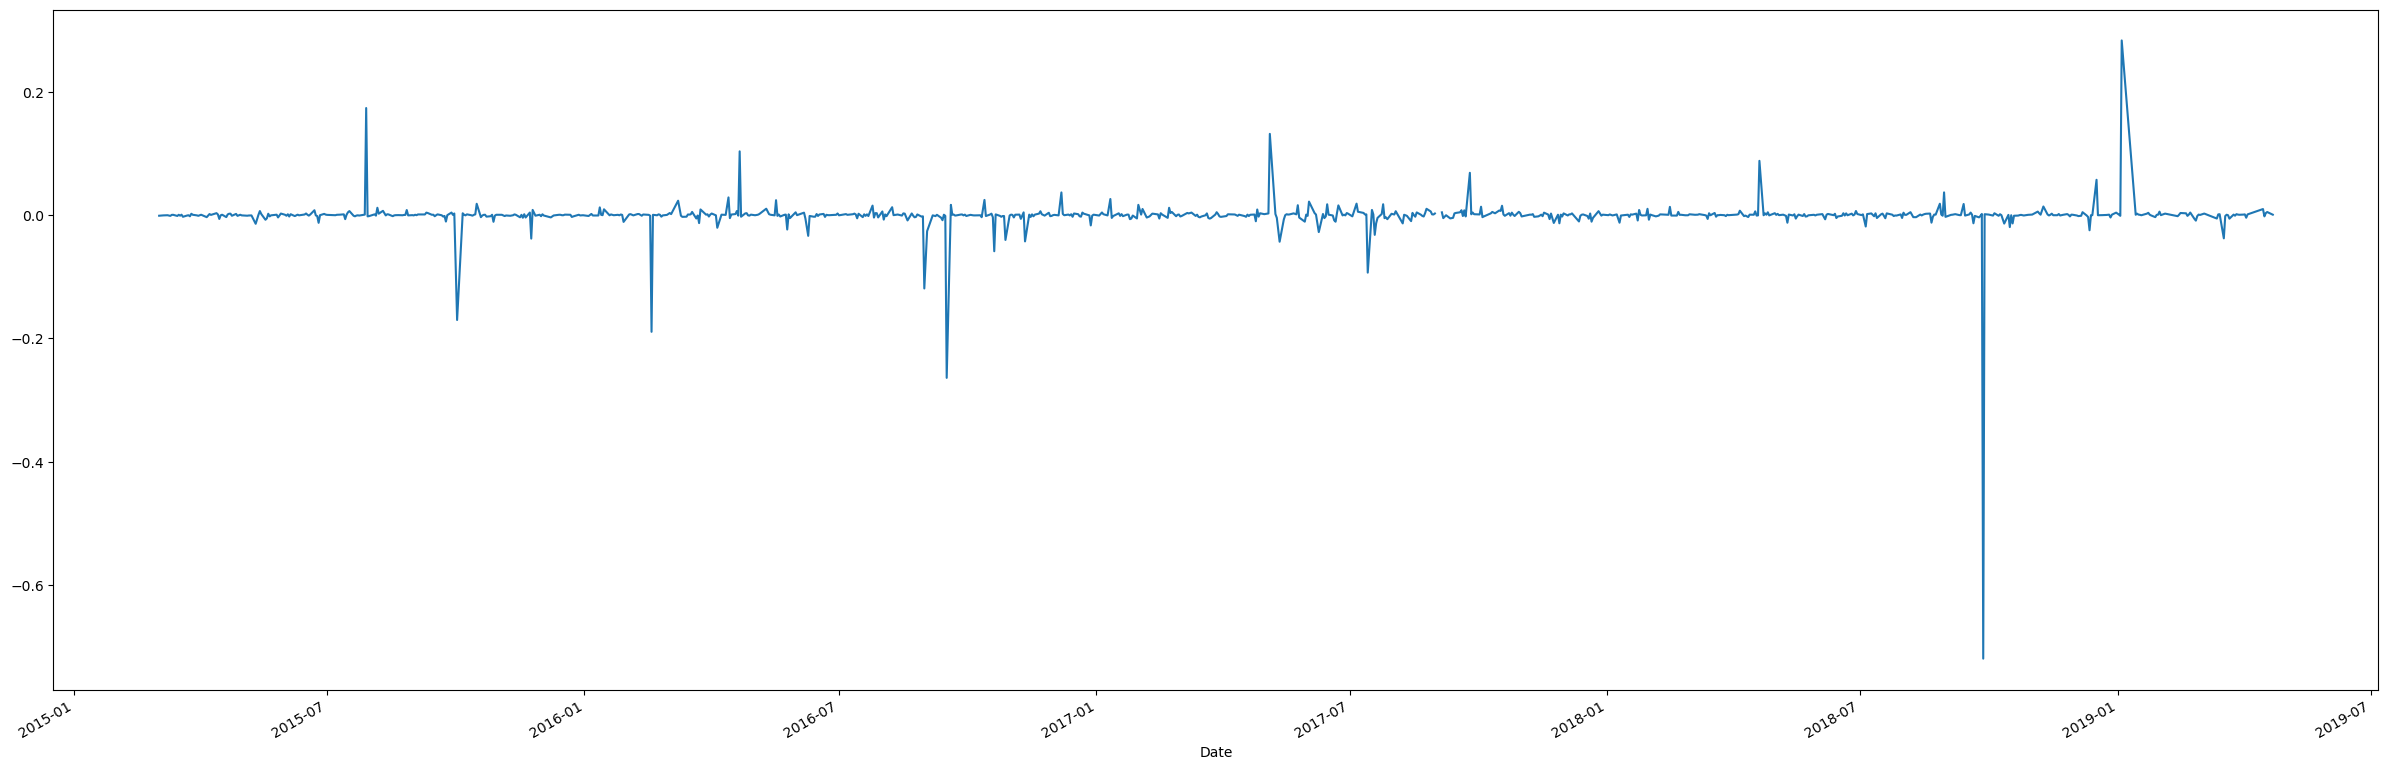

In [38]:
# Calculate covariance of a single portfolio
covariance_berk = strats_df['BERKSHIRE HATHAWAY INC'].cov(strats_df['Index'])
# Calculate variance of S&P 500
variance = strats_df['Index']
# Computing beta
beta = covariance_berk/variance
# Plot beta trend
beta.plot(figsize=(30,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [24]:
# Use `ewm` to calculate the rolling window
strats_df.ewm(halflife=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Index
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,0.004695,0.000995,0.005647,0.004617,0.002132,0.007432,0.003034
2015-03-09,0.004481,0.004991,0.007232,0.005784,0.001885,0.006834,0.005643
2015-03-11,0.005029,0.005221,0.006248,0.005562,0.003940,0.005946,0.005528
2015-03-12,0.006070,0.006380,0.008005,0.008867,0.003397,0.008278,0.013760
...,...,...,...,...,...,...,...
2019-04-16,0.009051,0.007946,0.019574,0.014472,0.008381,0.008751,0.009787
2019-04-17,0.008931,0.007910,0.019261,0.014237,0.008488,0.008685,0.009627
2019-04-18,0.008785,0.007783,0.018949,0.014004,0.008352,0.008553,0.009470


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe = (cumulative_returns.mean()*252)/(cumulative_returns.std()*np.sqrt(252))
sharpe

SOROS FUND MANAGEMENT LLC     -10.445641
PAULSON & CO.INC.             -27.260004
TIGER GLOBAL MANAGEMENT LLC    18.442923
BERKSHIRE HATHAWAY INC         -3.544074
Algo 1                         27.228362
Algo 2                          3.974001
Index                         -22.105432
dtype: float64

<Axes: >

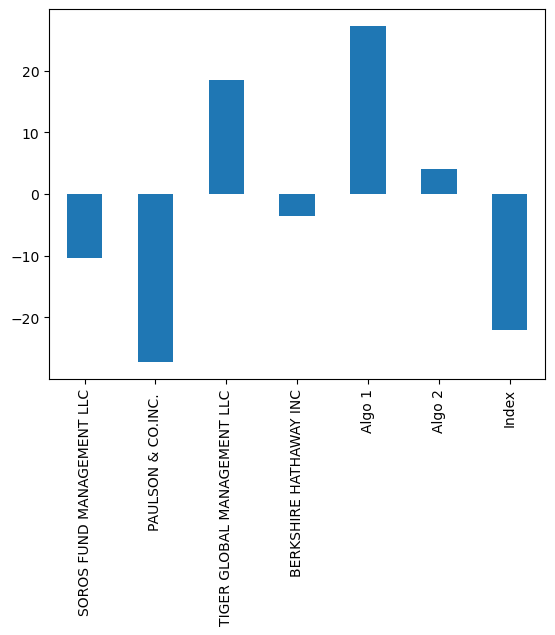

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# For time sake I downloaded the stocks information in a single DataFrame
custom_csv = Path('Resources/portfolio_historical.csv')
custom_df = pd.read_csv(custom_csv)
custom_df.drop(columns=['Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14'],inplace=True)
custom_df['Date'] = pd.to_datetime(custom_df['Date']).dt.date
custom_df = custom_df.set_index('Date')
custom_df.dropna(inplace=True)
custom_df

,AAPL,T,LMT,XOM
Date,,,,
2015-01-02,27.33,25.56,193.31,92.83
2015-01-05,26.56,25.32,189.29,90.29
2015-01-06,26.57,25.36,188.40,89.81
2015-01-07,26.94,25.03,190.83,90.72
2015-01-08,27.97,25.28,195.13,92.23
...,...,...,...,...
2019-12-23,71.00,29.40,391.90,70.29
2019-12-24,71.07,29.55,390.17,70.02
2019-12-26,72.48,29.61,392.30,70.13


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [28]:
# Set weights
weights = [0.25, 0.25, 0.25, 0.25]

# Calculate portfolio return
custom_df['AAPL'] = custom_df['AAPL'].pct_change(1)
custom_df['T'] = custom_df['T'].pct_change(1)
custom_df['LMT'] = custom_df['LMT'].pct_change(1)
custom_df['XOM'] = custom_df['XOM'].pct_change(1)
custom_df.dropna(inplace=True)
custom_return = custom_df.dot(weights)

# Display sample data
custom_return


Date
2015-01-05   -0.021430
2015-01-06   -0.002015
2015-01-07    0.005986
2015-01-08    0.021850
2015-01-09   -0.000917
                ...   
2019-12-23    0.008080
2019-12-24   -0.000542
2019-12-26    0.007225
2019-12-27   -0.001397
2019-12-30   -0.000808
Length: 1256, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [29]:
# Join your returns DataFrame to the original returns DataFrame
strats_df["Custom"] = custom_return
strats_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Index,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.006081
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,0.008698,-0.008411
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.015568,0.001375
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.003558,-0.006970
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,-0.020113,0.010943
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000436
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.006554
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.003455


In [30]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
strats_df.dropna(inplace=True)
strats_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Index,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.006081
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,0.008698,-0.008411
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.015568,0.001375
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.003558,-0.006970
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,-0.020113,0.010943
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.000578
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000436
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.006554


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [31]:
# Calculate the annualized `std`
strats_df.std()

SOROS FUND MANAGEMENT LLC      0.008083
PAULSON & CO.INC.              0.007049
TIGER GLOBAL MANAGEMENT LLC    0.011126
BERKSHIRE HATHAWAY INC         0.013203
Algo 1                         0.007719
Algo 2                         0.008443
Index                          0.008826
Custom                         0.008555
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

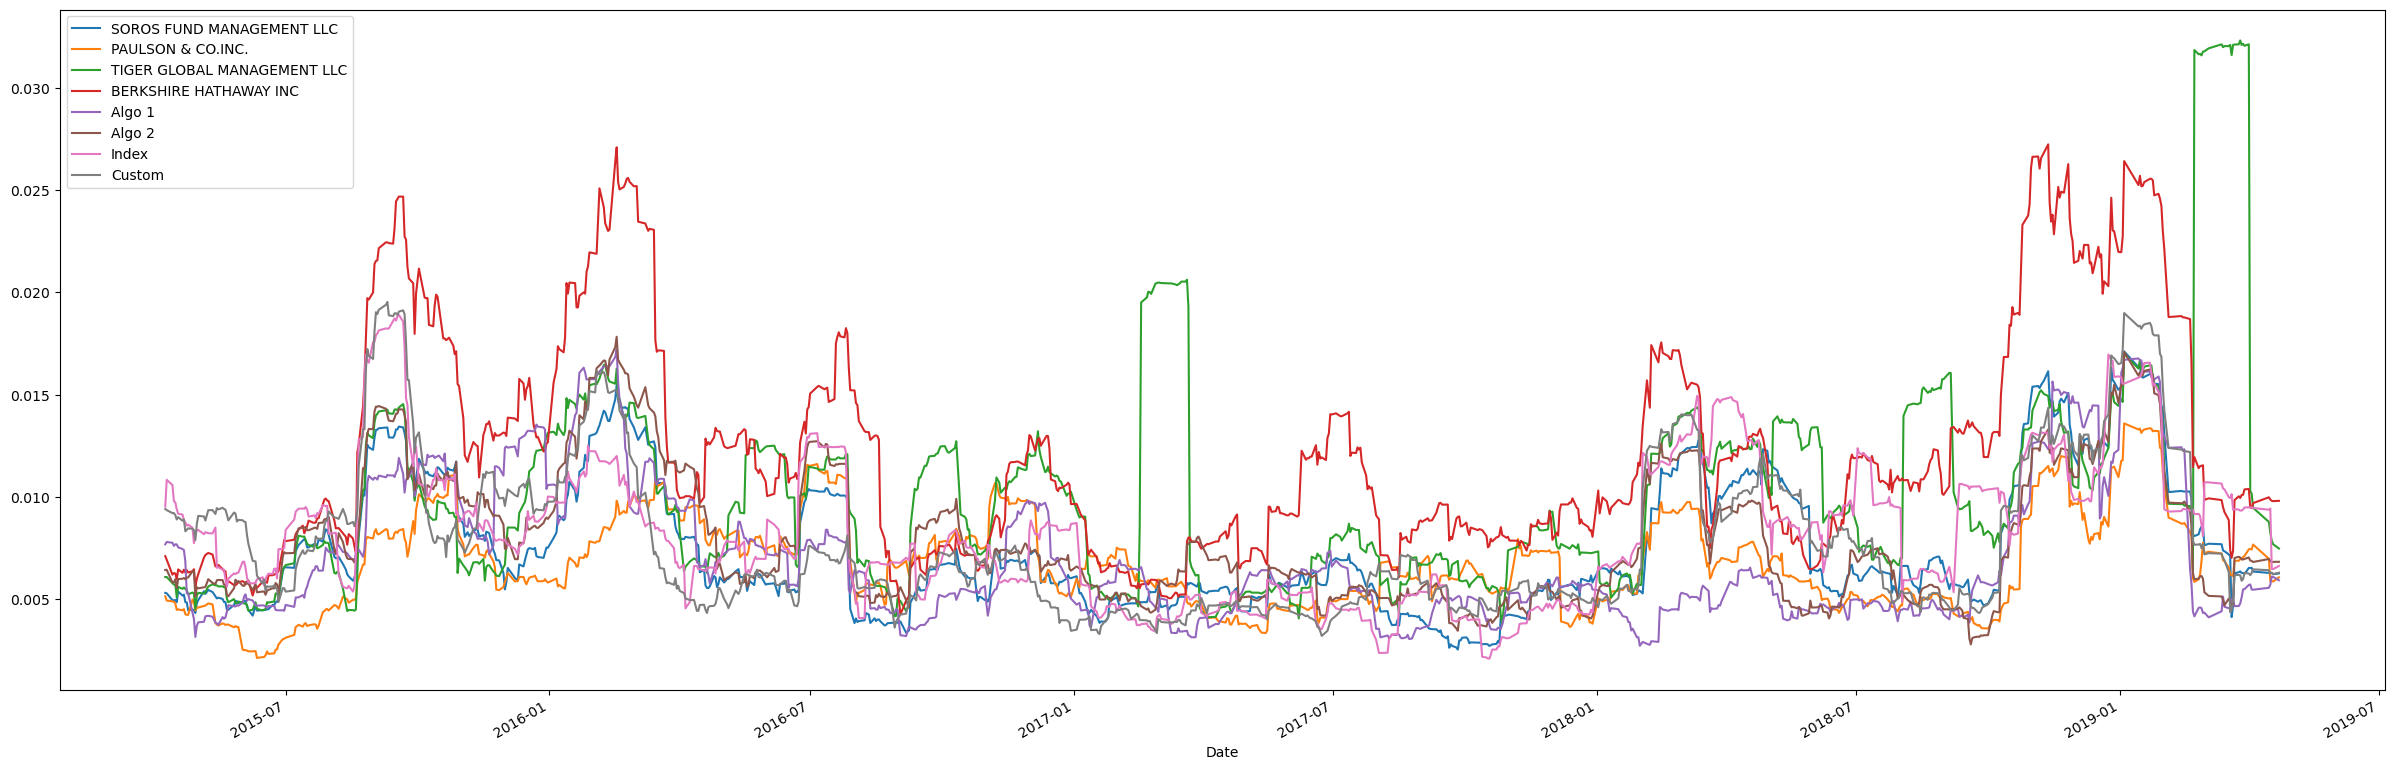

In [32]:
# Calculate rolling standard deviation
strats_df.rolling(window=21).std().plot(figsize=(30,10))
# Plot rolling standard deviation


### Calculate and plot the correlation

<Axes: >

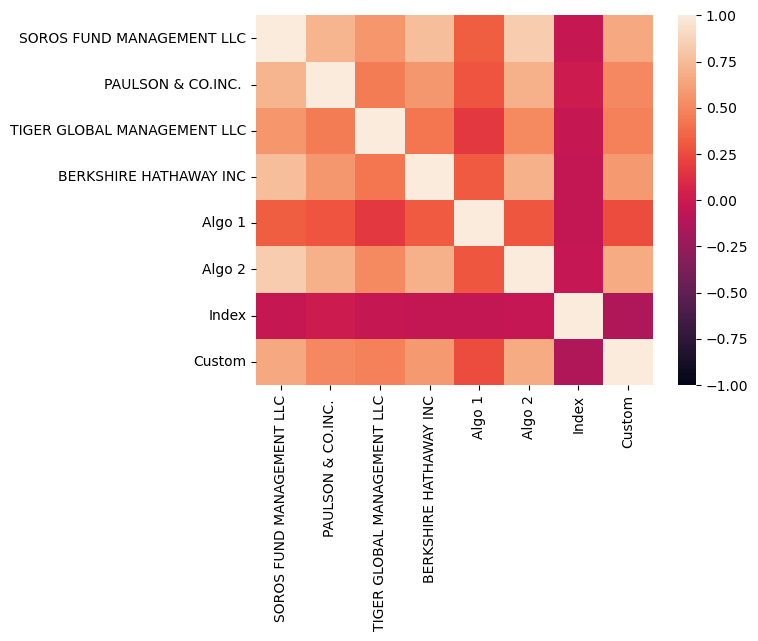

In [33]:
# Calculate and plot the correlation
correlation = strats_df.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: xlabel='Date'>

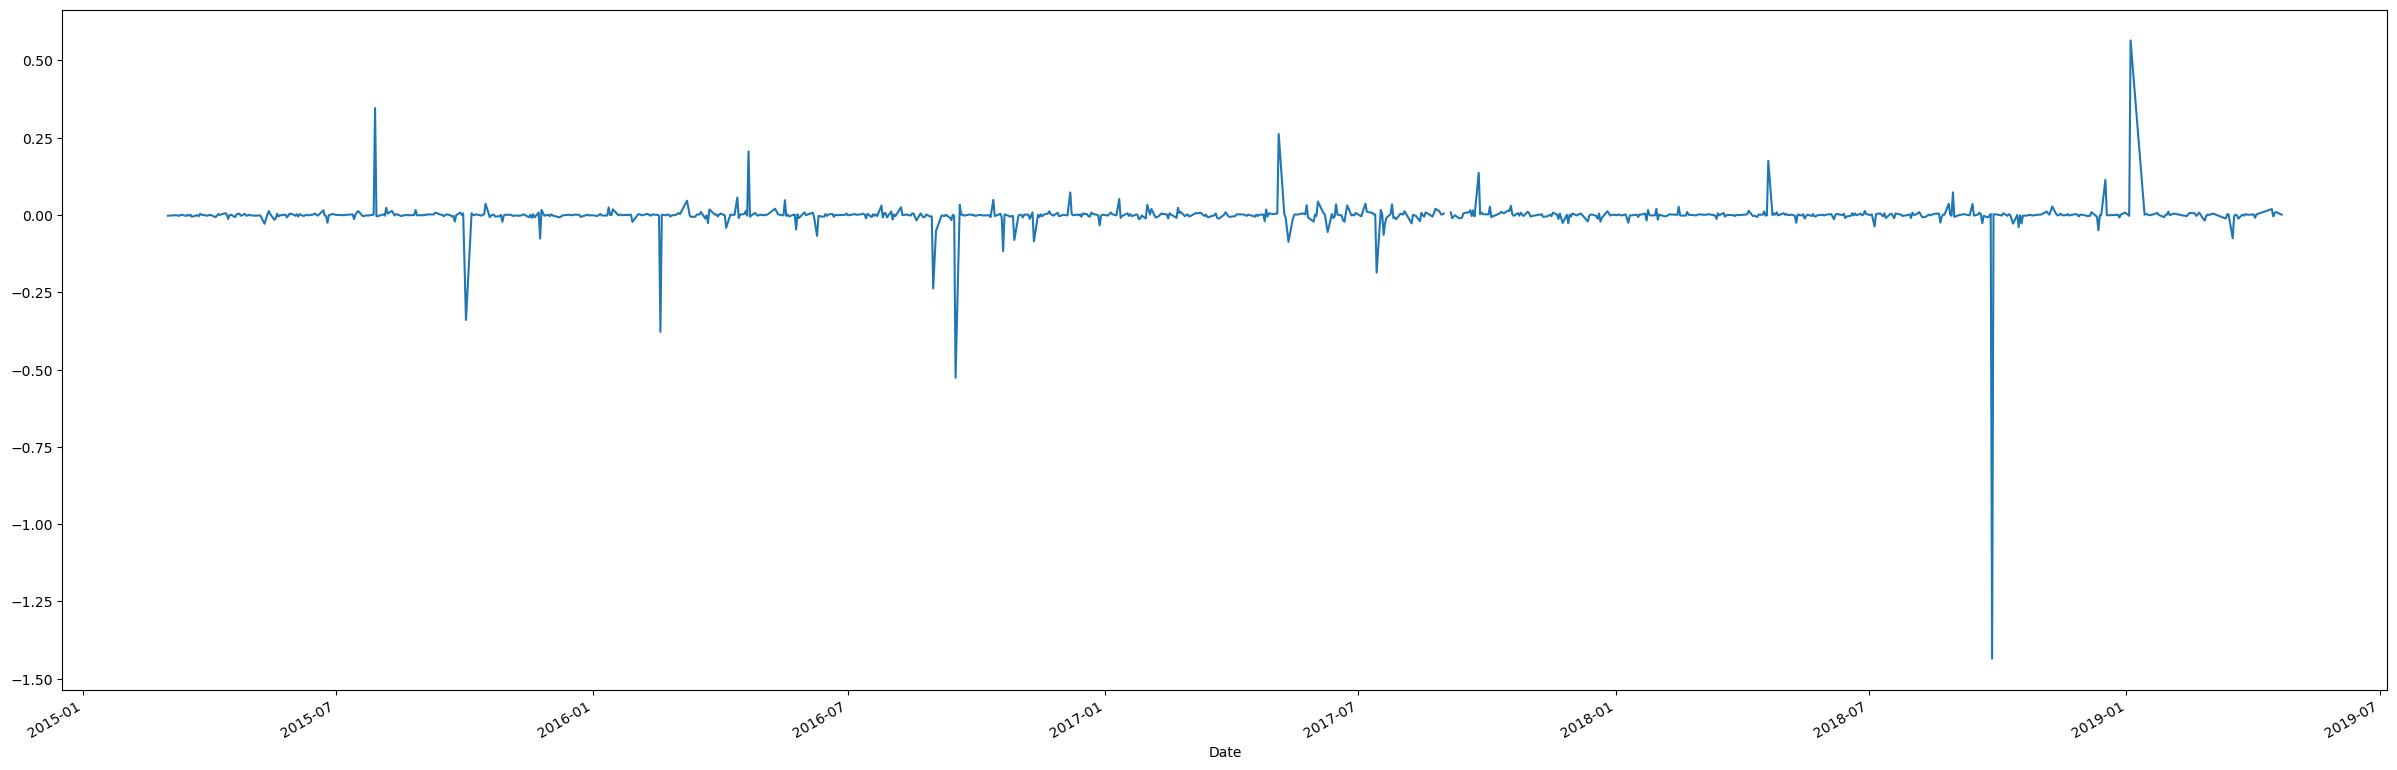

In [39]:
# Calculate and plot Beta
covariance_cust = strats_df['Custom'].cov(strats_df['Index'])
variance = strats_df['Index']
beta = covariance_cust/variance
beta.plot(figsize=(30,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Calculate Annualized Sharpe Ratios
sharpe = (cumulative_returns.mean()*252)/(cumulative_returns.std()*np.sqrt(252))
sharpe

SOROS FUND MANAGEMENT LLC     -10.445641
PAULSON & CO.INC.             -27.260004
TIGER GLOBAL MANAGEMENT LLC    18.442923
BERKSHIRE HATHAWAY INC         -3.544074
Algo 1                         27.228362
Algo 2                          3.974001
Index                         -22.105432
dtype: float64

In [36]:
# Visualize the sharpe ratios as a bar plot
sharpe.plot(kind='bar')

### How does your portfolio do?

Write your answer here!